# Statistic_Model_Forecast_v0.0.1

### Imports

In [1]:
# -*- coding:utf-8 -*-

%matplotlib inline 
# notebook

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from IPython.display import Image
import time

In [2]:
# import jupyter_core
# print jupyter_core.paths.jupyter_config_dir() + '\\custom'

In [3]:
# Remove warnings for SettingWithCopy
# pd.options.mode.chained_assignment = None  # default='warn'

### Style for notebook and pandas tables

In [4]:
from IPython.core.display import HTML

# Style for Matplotlib charts
style.use("fivethirtyeight")

style_folder = r"C:\Home\.ipython\profile_default\static\custom"
style_table = os.path.join(style_folder, "style-table.css")

css = open(style_table).read()
HTML('<style>{}</style>'.format(css))

### Changelog

### Improvements

### Issues

### Notes

### Functions

### Folders

In [5]:
data_folder = r"E:\Projects\Bet Systems\src\Stoixima-online Articles\Pandora\Data"
files_folder = r"E:\Projects\Bet Systems\src\Stoixima-online Articles\Pandora\Sports\Football\Winner\Statistic Model Forecast\Files"

### Load data

In [6]:
csv_filename = "Football_Data_20160715T013303.csv"

In [7]:
csv_fullpath = os.path.join(data_folder, csv_filename)

In [8]:
data = pd.read_csv(csv_fullpath, na_values=["", " ", "-"], low_memory=False)

In [9]:
data.shape

(164514, 137)

In [10]:
data.head()

,SEASON,COUNTRY,LEAGUE,DIV,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHP,...,SOH,SYA,SYD,SYH,VCA,VCD,VCH,WHA,WHD,WHH
0,1996,Belgium,Jupiler League,B1,04/08/1995,Aalst,Anderlecht,3-1,H,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996,Belgium,Jupiler League,B1,05/08/1995,Cercle Brugge,Antwerp,3-2,H,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,Belgium,Jupiler League,B1,05/08/1995,Charleroi,Mechelen,4-2,H,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996,Belgium,Jupiler League,B1,05/08/1995,Lierse,Harelbeke,0-1,A,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996,Belgium,Jupiler League,B1,05/08/1995,Molenbeek,Beveren,1-0,H,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


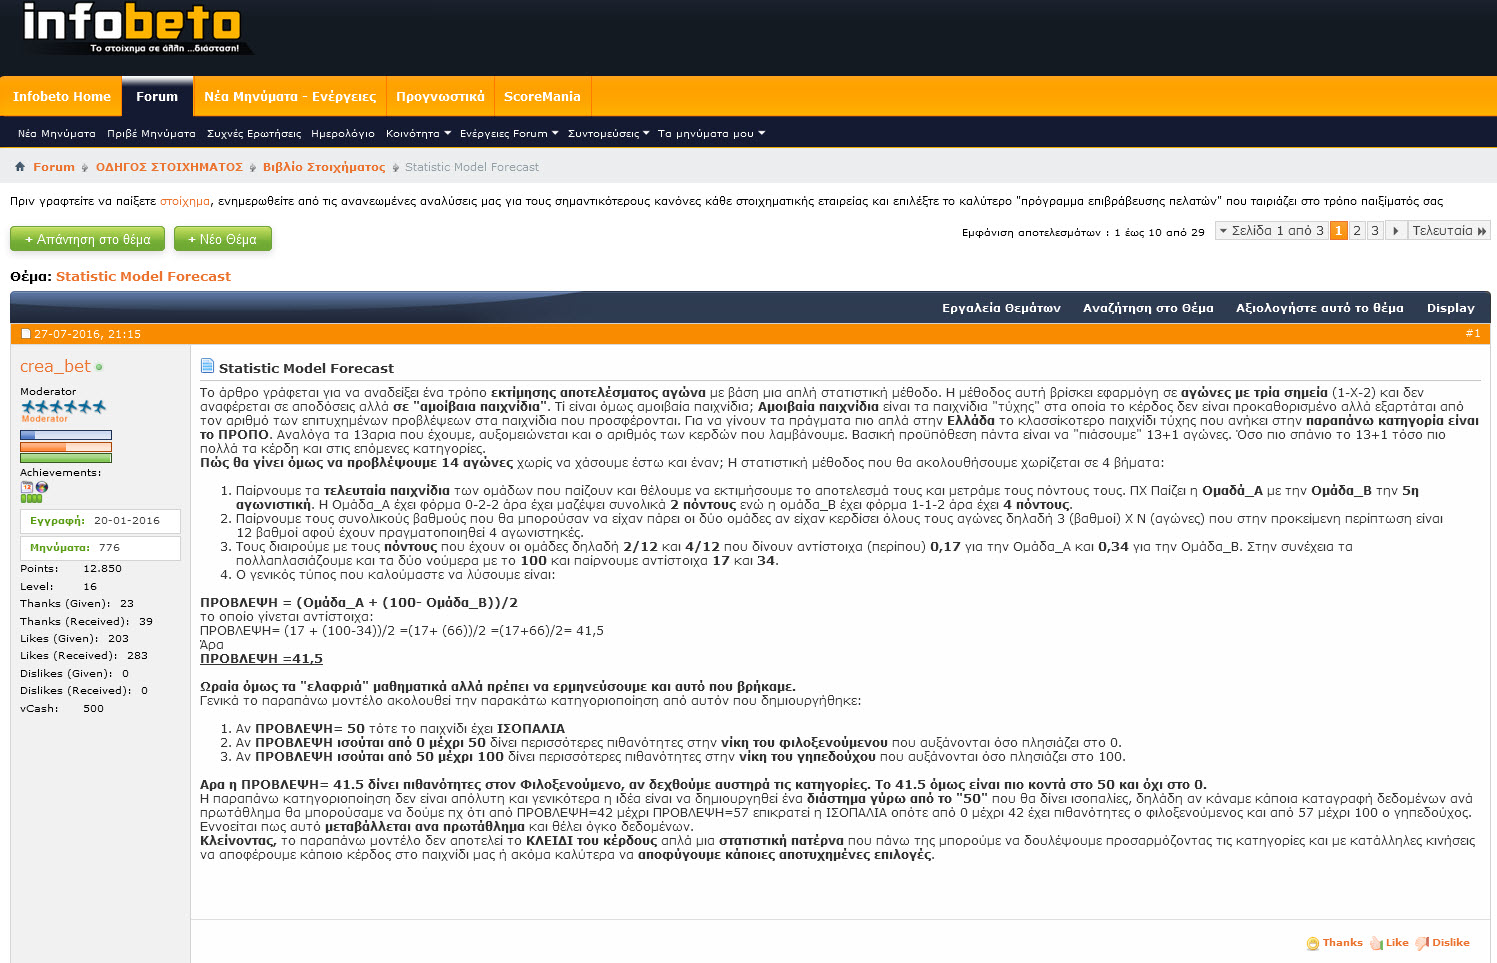

In [11]:
Image(os.path.join(files_folder, "Statistic Model Forecast.jpg"))

In [12]:
country = "England"
league = "Premier League"

In [13]:
selected_data = data[(data.COUNTRY == country) & (data.LEAGUE == league)].reset_index(drop=True)

In [14]:
selected_data.shape

(8904, 137)

In [15]:
selected_data.head()

,SEASON,COUNTRY,LEAGUE,DIV,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,FTHP,...,SOH,SYA,SYD,SYH,VCA,VCD,VCH,WHA,WHD,WHH
0,1994,England,Premier League,E0,14/08/1993,Arsenal,Coventry,0-3,A,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,England,Premier League,E0,14/08/1993,Aston Villa,QPR,4-1,H,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,England,Premier League,E0,14/08/1993,Chelsea,Blackburn,1-2,A,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994,England,Premier League,E0,14/08/1993,Liverpool,Sheffield Weds,2-0,H,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,England,Premier League,E0,14/08/1993,Man City,Leeds,1-1,D,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
matches_by_season = selected_data.groupby("SEASON")

In [30]:
start = time.time()

ftr_dict = {"A": 0, "D": 1, "H": 0}
custom_cols = ["THTHM", "THTAM", "THTM", "TATHM", "TATAM", "TATM", 
               "HTHP", "HTAP", "HTP", "ATHP", "ATAP", "ATP", 
               "HTPP", "ATPP", "HTSCR", "ATSCR", "PREDSCR"]
for custom_col in custom_cols:
    selected_data[custom_col] = np.nan
    
# selected_data["THTHM"] = np.nan
# selected_data["THTAM"] = np.nan
# selected_data["THTM"] = np.nan

# selected_data["TATHM"] = np.nan
# selected_data["TATAM"] = np.nan
# selected_data["TATM"] = np.nan

# selected_data["HTHP"] = np.nan
# selected_data["HTAP"] = np.nan
# selected_data["HTP"] = np.nan

# selected_data["ATHP"] = np.nan
# selected_data["ATAP"] = np.nan
# selected_data["ATP"] = np.nan

# selected_data["HTPP"] = np.nan
# selected_data["ATPP"] = np.nan

# selected_data["HTSCR"] = np.nan
# selected_data["ATSCR"] = np.nan

# selected_data["PREDSCR"] = np.nan

current_season = 0
for index, row in selected_data.iterrows():
#     print index,
    hometeam = row.HOMETEAM
    awayteam = row.AWAYTEAM
    ftr = row.FTR
    season = row.SEASON
    country = row.COUNTRY
    league = row.LEAGUE
    
    if season == 1995:
        break

#     matches = selected_data[(selected_data.SEASON == season)  & (selected_data.index < index)]
    if current_season != season:
        print current_season, "---->", season
        season_matches = matches_by_season.get_group(season)
        current_season = season        
#     start = time.time()
    matches = season_matches[(season_matches.index < index)]
#     stop = time.time() - start
#     print stop,
#     print matches.shape
#     start = time.time()
    if matches.shape[0] > 0:
    
        # Get HOMETEAM matches until this point
        hometeam_home_matches = matches[(matches.HOMETEAM == hometeam)]
        hometeam_away_matches = matches[(matches.AWAYTEAM == hometeam)]
        ththm = hometeam_home_matches.shape[0] 
        thtam = hometeam_away_matches.shape[0]
        thtm = ththm + thtam
        
        # Put in dataframe
        selected_data["THTHM"].ix[index] = ththm 
        selected_data["THTAM"].ix[index] = thtam
        selected_data["THTM"].ix[index] = thtm
        
        # Get AWAYTEAM matches until this point
        awayteam_home_matches = matches[(matches.HOMETEAM == awayteam)]
        awayteam_away_matches = matches[(matches.AWAYTEAM == awayteam)]
        tathm = awayteam_home_matches.shape[0] 
        tatam = awayteam_away_matches.shape[0]
        tatm = ththm + thtam
        
        # Put in dataframe
        selected_data["TATHM"].ix[index] = tathm
        selected_data["TATAM"].ix[index] = tatam
        selected_data["TATM"].ix[index] = tatm
        

        if thtm > 0 or tatm > 0:
            
            # Get HOMETEAM points 
            hometeam_home_points = hometeam_home_matches.FTR.replace({"A": 0, "D": 1, "H": 3}).sum()
            hometeam_away_points = hometeam_away_matches.FTR.replace({"A": 3, "D": 1, "H": 0}).sum()
            hometeam_points = hometeam_home_points + hometeam_away_points
            
            # Put in dataframe
            selected_data["HTHP"].ix[index] = hometeam_home_points
            selected_data["HTAP"].ix[index] = hometeam_away_points
            selected_data["HTP"].ix[index] = hometeam_points
            
            # Get AWAYTEAM points 
            awayteam_home_points = awayteam_home_matches.FTR.replace({"A": 0, "D": 1, "H": 3}).sum()
            awayteam_away_points = awayteam_away_matches.FTR.replace({"A": 3, "D": 1, "H": 0}).sum()
            awayteam_points = awayteam_home_points + awayteam_away_points
            
            # Put in dataframe
            selected_data["ATHP"].ix[index] = awayteam_home_points
            selected_data["ATAP"].ix[index] = awayteam_away_points
            selected_data["ATP"].ix[index] = awayteam_points

            # Get HOMETEAM points if it had won in every match
            hometeam_perfect_points = thtm * 3.
            
            # Get AWAYTEAM points if it had won in every match
            awayteam_perfect_points = tatm * 3.
            
            # Put in dataframe
            selected_data["HTPP"].ix[index] = hometeam_perfect_points
            selected_data["ATPP"].ix[index] = awayteam_perfect_points
            
            # Get HOMETEAM score
            try:
                hometeam_score = round(hometeam_points / hometeam_perfect_points, 3) * 100.
            except Exception as e:
                hometeam_score = np.nan
                
            # Get AWAYTEAM score
            try:
                awayteam_score = round(awayteam_points / awayteam_perfect_points, 3) * 100.
            except Exception as e:
                awayteam_score = np.nan
                
            # Get prediction score
            try:
                pred_score = (hometeam_score + (100. - awayteam_score)) / 2.
            except Exception as e:
                pred_score = np.nan
            
            # Put in dataframe
            selected_data["HTSCR"].ix[index] = hometeam_score
            selected_data["ATSCR"].ix[index] = awayteam_score
            
            selected_data["PREDSCR"].ix[index] = pred_score
#             stop = time.time() - start
#             print stop

stop = time.time() - start
print stop # 64s --> 68s --> 63s

0 ----> 1994
137.792999983


In [29]:
0.32 * 400

128.0

In [90]:
cols = ["SEASON", "COUNTRY", "LEAGUE", "DATE", "HOMETEAM", "AWAYTEAM", "B365H", "B365D", "B365A", "THTHM",
        "THTAM", "THTM", "TATHM", "TATAM", "TATM", "HTHP", "HTAP", "HTP", "ATHP", "ATAP", "ATP", "HTPP", "ATPP", "HTSCR", 
        "ATSCR", "PREDSCR", "FTR"] #, "PRED"]

In [91]:
smf_data = selected_data[cols]

In [92]:
smf_filename = "smf_data.csv"
smf_data.to_csv(os.path.join(files_folder, smf_filename), index=False)

In [87]:
smf_data.shape

(8904, 27)

In [88]:
smf_data.head()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTR,B365H,B365D,B365A,...,HTAP,HTP,ATHP,ATAP,ATP,HTPP,ATPP,HTSCR,ATSCR,PREDSCR
0,1994,England,Premier League,14/08/1993,Arsenal,Coventry,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994,England,Premier League,14/08/1993,Aston Villa,QPR,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,England,Premier League,14/08/1993,Chelsea,Blackburn,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994,England,Premier League,14/08/1993,Liverpool,Sheffield Weds,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994,England,Premier League,14/08/1993,Man City,Leeds,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
smf_data.tail()

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTR,B365H,B365D,B365A,...,HMAP,HMP,AMHP,AMAP,AMP,HMPP,AMPP,HMSCR,AMSCR,PREDSCR
8899,2016,England,Premier League,15/05/2016,Stoke,West Ham,H,3.50,3.60,2.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8900,2016,England,Premier League,15/05/2016,Swansea,Man City,D,6.00,4.75,1.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8901,2016,England,Premier League,15/05/2016,Watford,Sunderland,D,2.05,3.75,3.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8902,2016,England,Premier League,15/05/2016,West Brom,Liverpool,D,2.40,3.60,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8903,2016,England,Premier League,17/05/2016,Man United,Bournemouth,H,1.67,4.20,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
smf_data[smf_data.FTR == "H"].PREDSCR.describe()

count    4005.000000
mean       52.816929
std        12.580369
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max       100.000000
Name: PREDSCR, dtype: float64

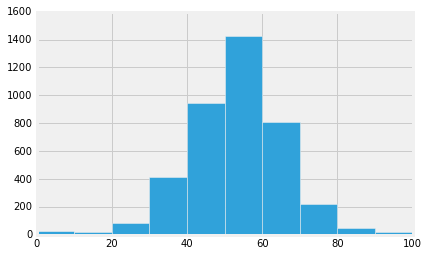

In [94]:
smf_data[smf_data.FTR == "H"].PREDSCR.hist()

In [96]:
# smf_data[smf_data.FTR == "H"].PREDSCR.plot(kind="scatter")

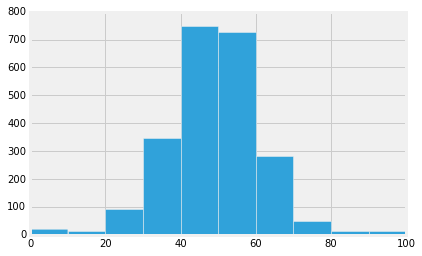

In [41]:
smf_data[selected_data.FTR == "D"].PREDSCR.hist()

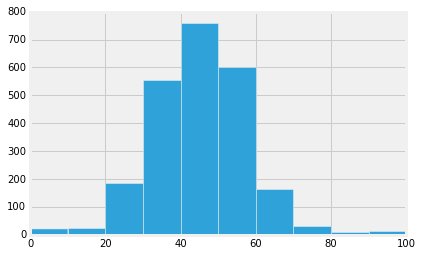

In [42]:
smf_data[selected_data.FTR == "A"].PREDSCR.hist()

In [34]:
40/50.

0.8

In [35]:
10/50.

0.2

In [36]:
1/0.2

5.0

In [37]:
selected_data[selected_data.PREDSCR < 40]

,index,SEASON,COUNTRY,LEAGUE,DIV,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,...,HMAP,HMP,AMHP,AMAP,AMP,HMPP,AMPP,HMSCR,AMSCR,PREDSCR
0,49744,1994,England,Premier League,E0,14/08/1993,Arsenal,Coventry,0-3,A,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
1,49745,1994,England,Premier League,E0,14/08/1993,Aston Villa,QPR,4-1,H,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
2,49746,1994,England,Premier League,E0,14/08/1993,Chelsea,Blackburn,1-2,A,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
3,49747,1994,England,Premier League,E0,14/08/1993,Liverpool,Sheffield Weds,2-0,H,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
4,49748,1994,England,Premier League,E0,14/08/1993,Man City,Leeds,1-1,D,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
5,49749,1994,England,Premier League,E0,14/08/1993,Newcastle,Tottenham,0-1,A,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
6,49750,1994,England,Premier League,E0,14/08/1993,Oldham,Ipswich,0-3,A,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
7,49751,1994,England,Premier League,E0,14/08/1993,Sheffield United,Swindon,3-1,H,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
8,49752,1994,England,Premier League,E0,14/08/1993,Southampton,Everton,0-2,A,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00
9,49753,1994,England,Premier League,E0,14/08/1993,West Ham,Wimbledon,0-2,A,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.00


In [44]:
pred_score = 40
print 50. / (50 - pred_score)

1.25


In [ ]:
def get_value_bet(x):
    pred_score = x.PREDSCR
    if pred_score < 50:
        pred_odds = 50. / (50 - pred_score)
    elif pred_score == 50:
        pred_odds = 3.33
    elif pred_score > 50:
        
        

In [46]:
def get_pred(x):
    pred_score = x.PREDSCR
    if pred_score < 50:
        pred = "A"
    elif pred_score == 50:
        pred = "D"
    elif pred_score > 50:
        pred = "H"
    else:
        pred = np.nan
        
    return pred

In [47]:
selected_data["PRED"] = selected_data.apply(lambda x: get_pred(x), axis=1)

In [48]:
selected_data.tail()

,index,SEASON,COUNTRY,LEAGUE,DIV,DATE,HOMETEAM,AWAYTEAM,FTSC,FTR,...,HMP,AMHP,AMAP,AMP,HMPP,AMPP,HMSCR,AMSCR,PREDSCR,PRED
8899,58643,2016,England,Premier League,E0,15/05/2016,Stoke,West Ham,2-1,H,...,48,34,28,62,111.0,111.0,43.2,55.9,43.65,A
8900,58644,2016,England,Premier League,E0,15/05/2016,Swansea,Man City,1-1,D,...,46,38,27,65,111.0,111.0,41.4,58.6,41.40,A
8901,58645,2016,England,Premier League,E0,15/05/2016,Watford,Sunderland,2-2,D,...,44,24,14,38,111.0,111.0,39.6,34.2,52.70,H
8902,58646,2016,England,Premier League,E0,15/05/2016,West Brom,Liverpool,1-1,D,...,42,32,27,59,111.0,111.0,37.8,53.2,42.30,A
8903,58647,2016,England,Premier League,E0,17/05/2016,Man United,Bournemouth,3-1,H,...,63,20,22,42,111.0,111.0,56.8,37.8,59.50,H


In [51]:
selected_data.columns.tolist()

['index',
 'SEASON',
 'COUNTRY',
 'LEAGUE',
 'DIV',
 'DATE',
 'HOMETEAM',
 'AWAYTEAM',
 'FTSC',
 'FTR',
 'FTHP',
 'FTAP',
 'FTHG',
 'FTAG',
 'FTHGD',
 'FTAGD',
 'HTSC',
 'HTR',
 'HTHP',
 'HTAP',
 'HTHG',
 'HTAG',
 'HTHGD',
 'HTAGD',
 'HT2SC',
 'HT2R',
 'HT2HP',
 'HT2AP',
 'HT2HG',
 'HT2AG',
 'HT2HGD',
 'HT2AGD',
 'FTUO',
 'FTGNG',
 'FTTG',
 'FTTGC',
 'HTUO',
 'HTGNG',
 'HTTG',
 'HTTGC',
 'HT2UO',
 'HT2GNG',
 'HT2TG',
 'HT2TGC',
 'B365HAOC',
 'B365HDOC',
 'B365ADOC',
 'ATTENDANCE',
 'REFEREE',
 'HS',
 'AS',
 'HST',
 'AST',
 'HHW',
 'AHW',
 'HC',
 'AC',
 'FTTC',
 'HF',
 'AF',
 'HO',
 'AO',
 'HY',
 'AY',
 'HR',
 'AR',
 'HBP',
 'ABP',
 'B365H',
 'B365D',
 'B365A',
 'B365<2.5',
 'B365>2.5',
 'B365AH',
 'B365AHA',
 'B365AHH',
 'BSA',
 'BSD',
 'BSH',
 'BWA',
 'BWD',
 'BWH',
 'BB1X2',
 'BBAH',
 'BBAHH',
 'BBAV<2.5',
 'BBAV>2.5',
 'BBAVA',
 'BBAVAHA',
 'BBAVAHH',
 'BBAVD',
 'BBAVH',
 'BBMX<2.5',
 'BBMX>2.5',
 'BBMXA',
 'BBMXAHA',
 'BBMXAHH',
 'BBMXD',
 'BBMXH',
 'BBOU',
 'GB<2.5',
 'GB>2.5',
 '

In [49]:
selected_data.to_clipboard()

In [54]:
cols = ['SEASON', 'COUNTRY', 'LEAGUE', 'DATE', 'HOMETEAM', 'AWAYTEAM', 'FTR', 'B365H', 'B365D', 'B365A', 'THMHM',
        'THMAM', 'THMM', 'TAMHM', 'TAMAM', 'TAMM', 'HMHP', 'HMAP', 'HMP', 'AMHP', 'AMAP', 'AMP', 'HMPP', 'AMPP', 'HMSCR', 
        'AMSCR', 'PREDSCR', 'PRED']

In [55]:
selected_data[cols]

,SEASON,COUNTRY,LEAGUE,DATE,HOMETEAM,AWAYTEAM,FTR,B365H,B365D,B365A,...,HMP,AMHP,AMAP,AMP,HMPP,AMPP,HMSCR,AMSCR,PREDSCR,PRED
0,1994,England,Premier League,14/08/1993,Arsenal,Coventry,A,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
1,1994,England,Premier League,14/08/1993,Aston Villa,QPR,H,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
2,1994,England,Premier League,14/08/1993,Chelsea,Blackburn,A,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
3,1994,England,Premier League,14/08/1993,Liverpool,Sheffield Weds,H,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
4,1994,England,Premier League,14/08/1993,Man City,Leeds,D,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
5,1994,England,Premier League,14/08/1993,Newcastle,Tottenham,A,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
6,1994,England,Premier League,14/08/1993,Oldham,Ipswich,A,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
7,1994,England,Premier League,14/08/1993,Sheffield United,Swindon,H,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
8,1994,England,Premier League,14/08/1993,Southampton,Everton,A,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A
9,1994,England,Premier League,14/08/1993,West Ham,Wimbledon,A,NaN,NaN,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.00,A


In [58]:
selected_data.pivot_table(index="FTR", columns="PRED", values="COUNTRY", aggfunc=len)

PRED,A,D,H
FTR,,,
A,1619,99,721
D,1281,105,977
H,1583,174,2343


In [77]:
pivot2 = selected_data.pivot_table(index="PRED", columns="FTR", values="COUNTRY", aggfunc=len, margins=True)

In [79]:
pivot2

FTR,A,D,H,All
PRED,,,,
A,1619.0,1281.0,1583.0,4483.0
D,99.0,105.0,174.0,378.0
H,721.0,977.0,2343.0,4041.0
All,2439.0,2363.0,4100.0,8902.0


In [ ]:
df = df.div(df.QT, axis='index')

Another tricky way is to transpose it first, divide it, and then transpose back:

df = (df.T / df.QT).T

In [81]:
(pivot2.T / pivot2.All).T

FTR,A,D,H,All
PRED,,,,
A,0.361142,0.285746,0.353112,1.0
D,0.261905,0.277778,0.460317,1.0
H,0.178421,0.241772,0.579807,1.0
All,0.273983,0.265446,0.460571,1.0


In [82]:
pivot2.T

PRED,A,D,H,All
FTR,,,,
A,1619.0,99.0,721.0,2439.0
D,1281.0,105.0,977.0,2363.0
H,1583.0,174.0,2343.0,4100.0
All,4483.0,378.0,4041.0,8902.0


In [83]:
(pivot2.T / pivot2.All)

PRED,A,D,H,All
FTR,,,,
A,0.361142,0.261905,0.178421,0.273983
D,0.285746,0.277778,0.241772,0.265446
H,0.353112,0.460317,0.579807,0.460571
All,1.000000,1.000000,1.000000,1.000000


In [84]:
(pivot2 / pivot2.All)

FTR,A,D,H,All
PRED,,,,
A,0.361142,3.388889,0.391735,0.503595
D,0.022083,0.277778,0.043059,0.042462
H,0.160830,2.584656,0.579807,0.453943
All,0.544055,6.251323,1.014600,1.000000
